<img src="images/seattlewaterfront.jpg">

# King County House Sales Analysis
Author: Jennifer Ha
***

## Overview placeholder
This analysis project explores trends in film business to provide Microsoft with actionable recommendations as they want to enter this business as well. we will review data sets from TheNumbers.com and IMDb to determine when Microsoft should release a movie, which types of genres to consider, and whom to recruit. The methodology includes filtering, and joining and visualizing data sets to show different trends in ROI. The result shows higher ROI when Mystery, Horror, and Animation movies are released in May-July, and November-December. I recommend Microsoft to partner with lists of top 10 actors and directors in those genres, and release movies during the summer (May-July) or holiday season (Nov-Dec).

## Business Problem placeholder
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.

In order to assist the stakeholders at Microsoft to make data-driven decisions for their new business, we will be reviewing and analyzing datasets to provide a viable and profitable business option. The findings and recommendations will help the stakeholders with better understanding of the movie industry, to decide when to release their movies and who to work with to drive a successful outcome.

## Data

### Data Preparation & Clean Up

In [1]:
# Import all libraries & packages
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import seaborn as sns
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as ev
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from scipy.special import boxcox, inv_boxcox
from matplotlib.gridspec import GridSpec

import scipy.stats as stats
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline

# Import my personal functions 
from functions import metrics, result_plot

# Remove scientific notation
pd.options.display.float_format = '{:,.5f}'.format

# Display all the columns without truncation
pd.set_option('display.max_columns', None)

# Import data into a dataframe and preview 
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00000",3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,"538,000.00000",3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,"1,991.00000",98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,"180,000.00000",2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,"604,000.00000",4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,"510,000.00000",3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [2]:
# Get summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Check for Duplicates

In [3]:
# Check for duplicates in 'id' which should work as index
df.id.duplicated().sum()

177

In [4]:
# Create a separate table to examine the duplicates
df_id_duplicates = df[df.duplicated('id')]

df_id_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,"700,000.00000",3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
314,4139480200,12/9/2014,"1,400,000.00000",4,3.25000,4290,12103,1.00000,0.00000,3.00000,3,11,2690,1600.0,1997,0.00000,98006,47.55030,-122.10200,3860,11244
325,7520000520,3/11/2015,"240,500.00000",2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,"1,984.00000",98146,47.49570,-122.35200,1820,7460
346,3969300030,12/29/2014,"239,900.00000",4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,nan,98178,47.48970,-122.24000,1020,7138
372,2231500030,3/24/2015,"530,000.00000",4,2.25000,2180,10754,1.00000,0.00000,0.00000,5,7,1100,1080.0,1954,0.00000,98133,47.77110,-122.34100,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,"645,000.00000",4,3.50000,2910,5260,2.00000,0.00000,0.00000,3,9,2910,0.0,2012,0.00000,98065,47.51680,-121.88300,2910,5260
20597,2724049222,12/1/2014,"220,000.00000",2,2.50000,1000,1092,2.00000,0.00000,0.00000,3,7,990,10.0,2004,0.00000,98118,47.54190,-122.27100,1330,1466
20654,8564860270,3/30/2015,"502,000.00000",4,2.50000,2680,5539,2.00000,nan,0.00000,3,8,2680,0.0,2013,0.00000,98045,47.47590,-121.73400,2680,5992
20764,6300000226,5/4/2015,"380,000.00000",4,1.00000,1200,2171,1.50000,0.00000,0.00000,3,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598


In [5]:
# Spot check data
df.loc[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,"430,000.00000",3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
94,6021501535,12/23/2014,"700,000.00000",3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500


In [6]:
# Spot check data
df.loc[df['id'] == 3969300030]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
345,3969300030,7/23/2014,"165,000.00000",4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,0.00000,98178,47.48970,-122.24000,1020,7138
346,3969300030,12/29/2014,"239,900.00000",4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,nan,98178,47.48970,-122.24000,1020,7138


In [7]:
# Spot check data
df.loc[df['id'] == 6300000226]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20763,6300000226,6/26/2014,"240,000.00000",4,1.00000,1200,2171,1.50000,0.00000,0.00000,3,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598
20764,6300000226,5/4/2015,"380,000.00000",4,1.00000,1200,2171,1.50000,0.00000,0.00000,3,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598


It appears that the IDs are being used to for each property rather than each transactions. I'm only going to keep the latest transaction only.

In [8]:
# Drop the older data
df.drop_duplicates(subset= 'id', keep= 'last', inplace= True)

In [9]:
# Check if the duplicates are removed
df.id.duplicated().sum()

0

### Price 고치기
Since the budget is $1,000,000 we will keep the data for properties 

In [10]:
df = df[df['price'] <= 1000000]

### Datetime - date

In [11]:
# Convert date
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['month_sold'] = df.date.dt.month
df['year_sold'] = df.date.dt.year
df.drop(['date'], axis= 1, inplace= True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19968 non-null  int64  
 1   price          19968 non-null  float64
 2   bedrooms       19968 non-null  int64  
 3   bathrooms      19968 non-null  float64
 4   sqft_living    19968 non-null  int64  
 5   sqft_lot       19968 non-null  int64  
 6   floors         19968 non-null  float64
 7   waterfront     17764 non-null  float64
 8   view           19911 non-null  float64
 9   condition      19968 non-null  int64  
 10  grade          19968 non-null  int64  
 11  sqft_above     19968 non-null  int64  
 12  sqft_basement  19968 non-null  object 
 13  yr_built       19968 non-null  int64  
 14  yr_renovated   16419 non-null  float64
 15  zipcode        19968 non-null  int64  
 16  lat            19968 non-null  float64
 17  long           19968 non-null  float64
 18  sqft_l

### Integer - sqft_basement

In [14]:
# Check why sqft_basement is an object and not an integer
df.sqft_basement.value_counts()

0.0       12173
?           422
600.0       210
500.0       203
700.0       191
          ...  
1740.0        1
2100.0        1
652.0         1
2090.0        1
415.0         1
Name: sqft_basement, Length: 266, dtype: int64

In [15]:
# Replace '?' in sqft_basement to 0 since they are unidentifiable
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

df.sqft_basement.value_counts()

0.0       12595
600.0       210
500.0       203
700.0       191
800.0       180
          ...  
2090.0        1
1740.0        1
1248.0        1
2300.0        1
666.0         1
Name: sqft_basement, Length: 265, dtype: int64

In [16]:
# Change data type of basement to float instead of object
df['sqft_basement'] = df.sqft_basement.astype('float')

### Null Values
We have identified that 'waterfront', 'view', and 'yr_renovated' columns have missing values. Let's examine each of them and determine how we will proceed.

In [17]:
# Check 'waterfront'
df.waterfront.value_counts(normalize = True)

0.00000   0.99719
1.00000   0.00281
Name: waterfront, dtype: float64

In [18]:
# Check 'view'
df.view.value_counts(normalize = True)

0.00000   0.92632
2.00000   0.03827
3.00000   0.01597
1.00000   0.01301
4.00000   0.00643
Name: view, dtype: float64

In [19]:
# Check 'yr_renovated'
df.yr_renovated.value_counts(normalize = True)

0.00000       0.96370
2,014.00000   0.00384
2,013.00000   0.00164
2,000.00000   0.00152
2,007.00000   0.00140
                ...  
1,956.00000   0.00006
1,948.00000   0.00006
1,971.00000   0.00006
1,953.00000   0.00006
1,934.00000   0.00006
Name: yr_renovated, Length: 70, dtype: float64

Above analysis shows that:
1. 99.2% of houses in the dataseet are not near the Seattle waterfront.
2. 90.1% of houses do not have a view. 
3. 95.8% of houses have not been renovated since it was built.

While having such large amount of null values can be problematic, it makes sense in this scenario.Therefore, we will simply replace those null values with zeros. 

In [20]:
# Replace null values with zeros
df.fillna(0, inplace= True)

Lastly, let's re-set the index.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19968 non-null  int64  
 1   price          19968 non-null  float64
 2   bedrooms       19968 non-null  int64  
 3   bathrooms      19968 non-null  float64
 4   sqft_living    19968 non-null  int64  
 5   sqft_lot       19968 non-null  int64  
 6   floors         19968 non-null  float64
 7   waterfront     19968 non-null  float64
 8   view           19968 non-null  float64
 9   condition      19968 non-null  int64  
 10  grade          19968 non-null  int64  
 11  sqft_above     19968 non-null  int64  
 12  sqft_basement  19968 non-null  float64
 13  yr_built       19968 non-null  int64  
 14  yr_renovated   19968 non-null  float64
 15  zipcode        19968 non-null  int64  
 16  lat            19968 non-null  float64
 17  long           19968 non-null  float64
 18  sqft_l

For this exercise, we will focus on whether the property has been renovated rather than when it was renovated. Therefore, Let's replace the values with 1 if renovated, and keep 0 if not renovated.

In [22]:
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

In [23]:
# Drop 'id' as we no longer need this column

df.drop(['id'], axis= 1, inplace= True)

### Baseline Model
Now that we cleaned up the data, let's take a look at a baseline model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2249.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:39:14   Log-Likelihood:            -2.5989e+05
No. Observations:               19968   AIC:                         5.198e+05
Df Residuals:                   19947   BIC:                         5.200e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.959e+07   5.61e+06     -8.839      0.000   -6.06e+07   -3.86e+07
bedrooms      -8154.0969   1096.398     -7.437      0.000   -1.03e+04   -6005.067
bathrooms      2.317e+04   1898.854     12.200      0.000    1.94e+04    2.69e+04
sqft_living      60.2597     10.912      5.522      0.000      38.871      81.649
sqft_lot          0.2365      0.027      8.676      0.000       0.183       0.290
floors         3.255e+04   2069.906     15.725      0.000    2.85e+04    3.66e+04
waterfront     1.461e+05   1.61e+04      9.069      0.000    1.15e+05    1.78e+05
view           2.709e+04   1365.149     19.844      0.000    2.44e+04    2.98e+04
condition      2.589e+04   1328.074     19.492      0.000    2.33e+04    2.85e+04
grade          7.002e+04   1262.123     55.480      0.000    6.75e+04    7.25e+04
sqft_above        7.3018     10.887      0.671      0.502     -14.038      28.642
sqft_basement     5.9764     10.806      0.553      0.580     -15.204      27.157
yr_built      -1768.2770     41.661    -42.444      0.000   -1849.936   -1686.618
yr_renovated   2.649e+04   4751.298      5.576      0.000    1.72e+04    3.58e+04
zipcode        -205.9184     18.618    -11.060      0.000    -242.412    -169.425
lat            5.402e+05   5921.726     91.218      0.000    5.29e+05    5.52e+05
long          -3.675e+04   7322.781     -5.019      0.000   -5.11e+04   -2.24e+04
sqft_living15    47.6011      2.125     22.404      0.000      43.437      51.766
sqft_lot15       -0.1303      0.042     -3.128      0.002      -0.212      -0.049
month_sold      350.3231    397.612      0.881      0.378    -429.030    1129.676
year_sold      2.117e+04   2655.589      7.973      0.000     1.6e+04    2.64e+04
==============================================================================
Omnibus:                     1082.676   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.700
Skew:                           0.460   Prob(JB):                         0.00
Kurtosis:                       4.102   Cond. No.                     7.32e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f8bf48c2490>,
 <Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>,
        <AxesSubplot:title={'center':'Homoscedasticity of Residuals'}, xlabel='Predicted Price', ylabel='Residuals'>],
       dtype=object))

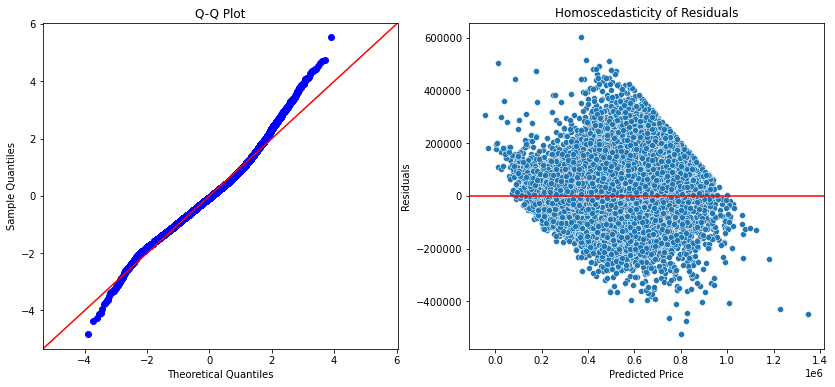

In [24]:
result_plot(df)

### Outliers

let's visualize and check the distributions in each column


In [25]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
count,"19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000","19,968.00000"
mean,"469,329.01598",3.32307,2.04169,"1,958.12285","14,537.10196",1.47316,0.00250,0.16271,3.40650,7.51022,"1,695.02794",257.45618,"1,970.83218",0.02985,"98,078.49249",47.55604,-122.21307,"1,910.34014","12,390.72601",6.56816,"2,014.32502"
std,"196,082.43581",0.90615,0.70186,756.06477,"40,098.19625",0.53671,0.04998,0.62053,0.64534,1.01162,712.15705,401.48630,29.12310,0.17017,53.27732,0.14172,0.14250,601.41960,"26,475.27016",3.12130,0.46839
min,"78,000.00000",1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,0.00000,"1,900.00000",0.00000,"98,001.00000",47.15590,-122.51900,399.00000,651.00000,1.00000,"2,014.00000"
25%,"315,000.00000",3.00000,1.50000,"1,400.00000","5,000.00000",1.00000,0.00000,0.00000,3.00000,7.00000,"1,170.00000",0.00000,"1,952.00000",0.00000,"98,033.00000",47.45760,-122.33000,"1,470.00000","5,040.00000",4.00000,"2,014.00000"
50%,"435,000.00000",3.00000,2.00000,"1,840.00000","7,500.00000",1.00000,0.00000,0.00000,3.00000,7.00000,"1,510.00000",0.00000,"1,974.00000",0.00000,"98,065.00000",47.56595,-122.23200,"1,800.00000","7,526.00000",6.00000,"2,014.00000"
75%,"595,000.00000",4.00000,2.50000,"2,410.00000","10,260.00000",2.00000,0.00000,0.00000,4.00000,8.00000,"2,090.00000",500.00000,"1,996.00000",0.00000,"98,118.00000",47.68010,-122.12200,"2,260.00000","9,840.00000",9.00000,"2,015.00000"
max,"1,000,000.00000",33.00000,7.50000,"7,480.00000","1,651,359.00000",3.50000,1.00000,4.00000,5.00000,12.00000,"5,710.00000","2,720.00000","2,015.00000",1.00000,"98,199.00000",47.77760,-121.31500,"4,950.00000","871,200.00000",12.00000,"2,015.00000"


In [26]:
col = df.columns
col

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold'],
      dtype='object')

In [27]:
def plot_boxplots(df, col=None, boxplot=True):
    fig = plt.figure(figsize=(11, 6))
    gs = GridSpec(nrows=2, ncols=2)

    ax1 = fig.add_subplot(gs[1, 0])
    if col is None:
        data = df.copy()
        name = data.name
    else:
        data = df[col].copy()
        name = col

    ## Plot Boxplot
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title(F"Box Plot of {name.title()}")

<ipython-input-27-5dfc28bec094>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(11, 6))


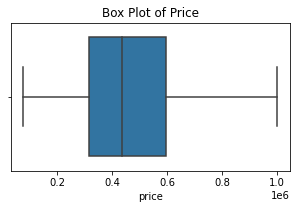

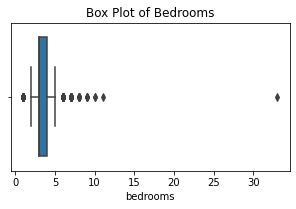

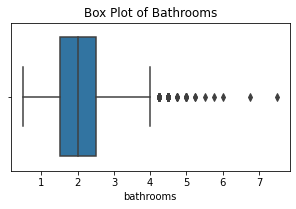

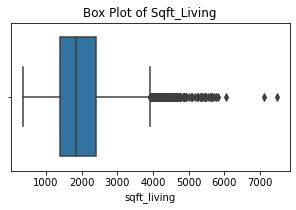

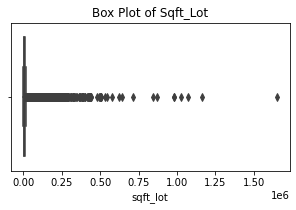

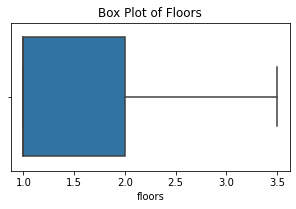

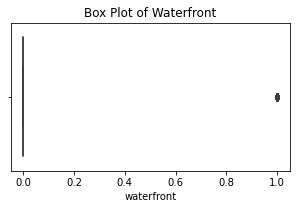

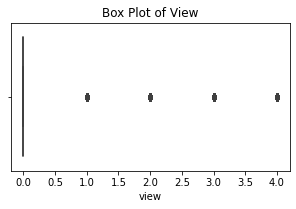

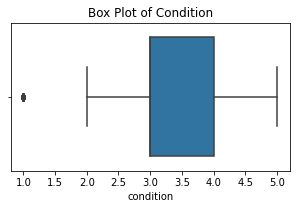

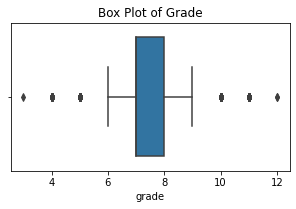

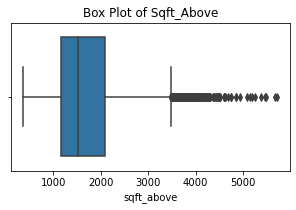

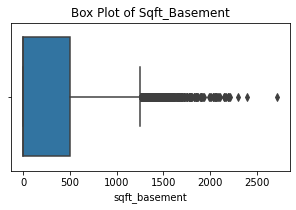

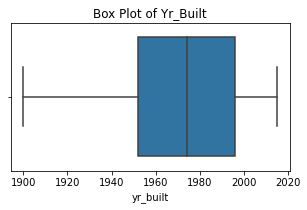

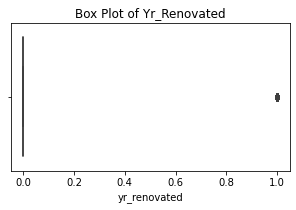

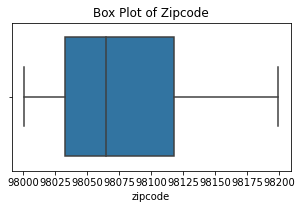

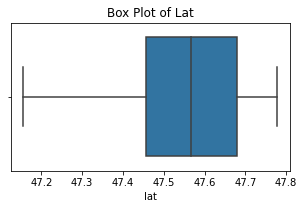

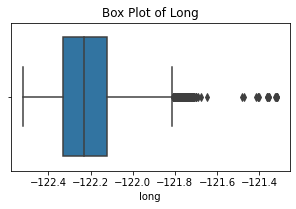

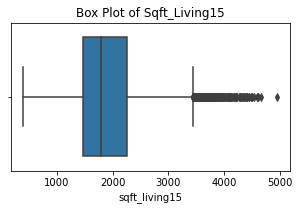

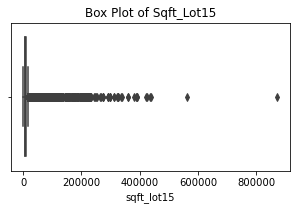

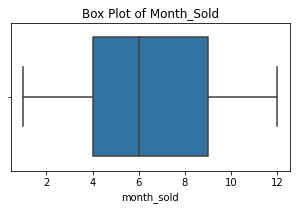

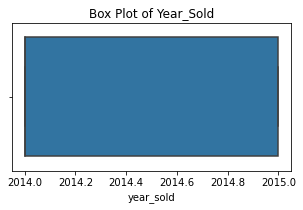

In [28]:
for col in df:
    plot_boxplots(df =df , col=col)

In [29]:
# Remove outliers using IQR method
# Code modified from https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr
def outlier_IQR(df):
    
    keep = df.describe()
    q1 = keep['25%']
    q3 = keep['75%']
    IQR = q3-q1
    outliers =(df < (q1- 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))
    return outliers

In the 'Explore' section, we saw that we have many outliers several columns. We will proceed to remove outliers from those columns that have extreme outliers, based on our boxplot visualizations

In [30]:
# Create list of columns to remove outliers from
outliers_col = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
                'sqft_basement', 'sqft_living15', 'sqft_lot15']
df_outliers = df.copy()

# Remove outliers for specified columns
for col in outliers_col:
    df_outliers = df_outliers[~outlier_IQR(df_outliers[col])]

In [31]:
df_outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,"221,900.00000",3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.00000,1955,0.00000,98178,47.51120,-122.25700,1340,5650,10,2014
1,"538,000.00000",3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.00000,1951,1.00000,98125,47.72100,-122.31900,1690,7639,12,2014
2,"180,000.00000",2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.00000,1933,0.00000,98028,47.73790,-122.23300,2720,8062,2,2015
3,"604,000.00000",4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.00000,1965,0.00000,98136,47.52080,-122.39300,1360,5000,12,2014
4,"510,000.00000",3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.00000,1987,0.00000,98074,47.61680,-122.04500,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,"360,000.00000",3,2.50000,1530,1131,3.00000,0.00000,0.00000,3,8,1530,0.00000,2009,0.00000,98103,47.69930,-122.34600,1530,1509,5,2014
21593,"400,000.00000",4,2.50000,2310,5813,2.00000,0.00000,0.00000,3,8,2310,0.00000,2014,0.00000,98146,47.51070,-122.36200,1830,7200,2,2015
21594,"402,101.00000",2,0.75000,1020,1350,2.00000,0.00000,0.00000,3,7,1020,0.00000,2009,0.00000,98144,47.59440,-122.29900,1020,2007,6,2014
21595,"400,000.00000",3,2.50000,1600,2388,2.00000,0.00000,0.00000,3,8,1600,0.00000,2004,0.00000,98027,47.53450,-122.06900,1410,1287,1,2015


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1623.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:39:16   Log-Likelihood:            -2.0570e+05
No. Observations:               15868   AIC:                         4.115e+05
Df Residuals:                   15847   BIC:                         4.116e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.187e+07   6.01e+06     -6.966      0.000   -5.36e+07   -3.01e+07
bedrooms      -8865.7380   1391.907     -6.369      0.000   -1.16e+04   -6137.442
bathrooms      1.821e+04   2144.590      8.492      0.000     1.4e+04    2.24e+04
sqft_living      78.9126     13.096      6.026      0.000      53.244     104.581
sqft_lot         -2.2065      0.548     -4.028      0.000      -3.280      -1.133
floors         7437.6850   2484.730      2.993      0.003    2567.331    1.23e+04
waterfront     2.647e+05   2.94e+04      9.003      0.000    2.07e+05    3.22e+05
view           3.045e+04   1662.846     18.312      0.000    2.72e+04    3.37e+04
condition      2.612e+04   1416.166     18.447      0.000    2.33e+04    2.89e+04
grade          7.495e+04   1440.333     52.033      0.000    7.21e+04    7.78e+04
sqft_above        9.5035     13.073      0.727      0.467     -16.121      35.129
sqft_basement     1.5256     12.950      0.118      0.906     -23.858      26.909
yr_built      -1893.7499     43.898    -43.139      0.000   -1979.796   -1807.704
yr_renovated   3.107e+04   5232.869      5.937      0.000    2.08e+04    4.13e+04
zipcode        -256.7349     20.035    -12.814      0.000    -296.006    -217.464
lat            5.341e+05   6430.526     83.056      0.000    5.21e+05    5.47e+05
long          -6499.2568   8492.477     -0.765      0.444   -2.31e+04    1.01e+04
sqft_living15    47.2706      2.659     17.776      0.000      42.058      52.483
sqft_lot15       -7.0215      0.625    -11.241      0.000      -8.246      -5.797
month_sold      318.7843    424.981      0.750      0.453    -514.226    1151.795
year_sold      2.193e+04   2837.675      7.729      0.000    1.64e+04    2.75e+04
==============================================================================
Omnibus:                     1149.096   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1952.117
Skew:                           0.550   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                     7.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f8bf67104c0>,
 <Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>,
        <AxesSubplot:title={'center':'Homoscedasticity of Residuals'}, xlabel='Predicted Price', ylabel='Residuals'>],
       dtype=object))

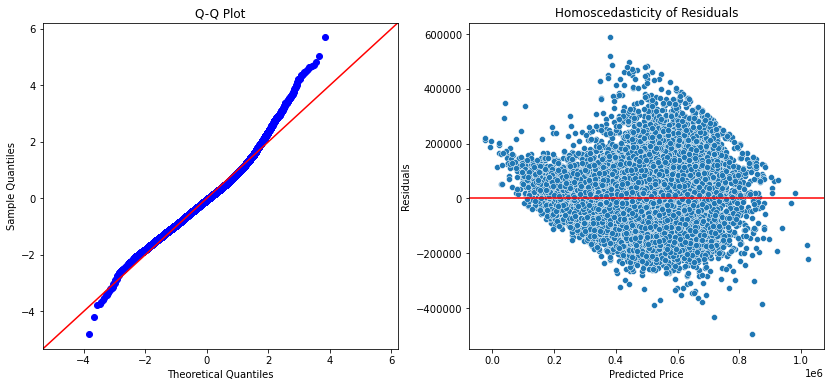

In [32]:
result_plot(df_outliers)

In [33]:
# Create correlation matrix from dataframe
price_corr = df_outliers.corr().round(2)
price_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
price,1.00000,0.22000,0.34000,0.51000,-0.10000,0.22000,0.05000,0.21000,0.07000,0.53000,0.38000,0.23000,-0.06000,0.10000,0.05000,0.49000,-0.04000,0.43000,-0.11000,-0.01000,0.00000
bedrooms,0.22000,1.00000,0.44000,0.60000,0.21000,0.13000,-0.00000,0.02000,0.03000,0.28000,0.47000,0.25000,0.14000,0.00000,-0.17000,-0.08000,0.15000,0.38000,0.19000,0.00000,-0.01000
bathrooms,0.34000,0.44000,1.00000,0.68000,-0.08000,0.52000,-0.01000,0.06000,-0.15000,0.57000,0.59000,0.18000,0.56000,0.02000,-0.22000,-0.05000,0.24000,0.49000,-0.09000,0.02000,-0.04000
sqft_living,0.51000,0.60000,0.68000,1.00000,0.17000,0.32000,0.01000,0.12000,-0.06000,0.61000,0.81000,0.36000,0.31000,0.03000,-0.20000,-0.03000,0.24000,0.69000,0.15000,0.02000,-0.04000
sqft_lot,-0.10000,0.21000,-0.08000,0.17000,1.00000,-0.41000,0.04000,0.03000,0.14000,-0.03000,0.13000,0.08000,-0.08000,-0.02000,-0.25000,-0.15000,0.24000,0.22000,0.88000,-0.00000,0.00000
floors,0.22000,0.13000,0.52000,0.32000,-0.41000,1.00000,-0.01000,-0.01000,-0.28000,0.46000,0.52000,-0.30000,0.51000,-0.00000,-0.06000,0.02000,0.11000,0.23000,-0.42000,0.01000,-0.02000
waterfront,0.05000,-0.00000,-0.01000,0.01000,0.04000,-0.01000,1.00000,0.21000,-0.00000,-0.00000,-0.00000,0.02000,-0.02000,0.04000,0.04000,-0.02000,-0.01000,0.02000,0.04000,0.01000,-0.01000
view,0.21000,0.02000,0.06000,0.12000,0.03000,-0.01000,0.21000,1.00000,0.02000,0.10000,0.03000,0.15000,-0.08000,0.05000,0.13000,0.01000,-0.10000,0.16000,0.03000,0.00000,0.00000
condition,0.07000,0.03000,-0.15000,-0.06000,0.14000,-0.28000,-0.00000,0.02000,1.00000,-0.18000,-0.17000,0.18000,-0.36000,-0.06000,-0.00000,0.01000,-0.08000,-0.11000,0.15000,0.02000,-0.05000
grade,0.53000,0.28000,0.57000,0.61000,-0.03000,0.46000,-0.00000,0.10000,-0.18000,1.00000,0.62000,0.03000,0.48000,-0.01000,-0.17000,0.07000,0.16000,0.58000,-0.03000,0.02000,-0.04000


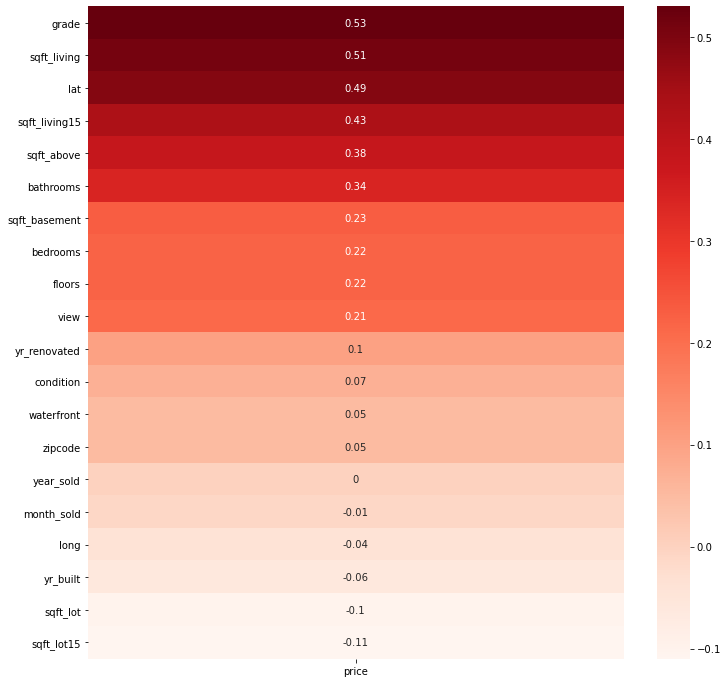

In [34]:
# Correlation heatmap customization guide was utilized to create the following visualizations:
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(price_corr[['price']].drop('price').sort_values(by='price', ascending=False), annot=True, 
            ax=ax, cmap='Reds');

In [35]:
# Drop price to only show correlation between independent variables
corr = df_outliers.drop('price', axis=1).corr().round(2)

In [36]:
# Create mask for upper triangle of matrix
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

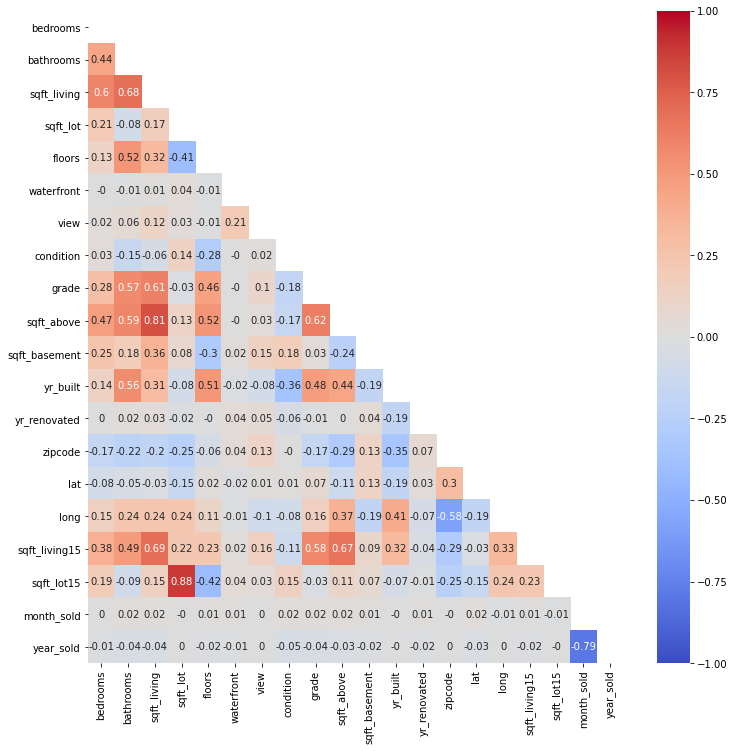

In [37]:
# Create heatmap correlation matrix
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1,mask=mask);

### Exploratory Data Analysis (EDA)

## Model 1

## Model 2

## Model 3

## Conclusions Placeholder
This analysis leads to three recommendations for creating movies :

**1. Release movies in May, June, July, November, or December.** Our analysis shows that summertime and holiday seasons are the best time of year to release a movie. If Microsoft wants to release a movie across the world simultaneously, I recommend launching a movie in June or July. If different timeline can be applied, release a movie in the States in May first, then internationally in June.

**2. Produce a movie in Mystery, Horror, Animation genres.** Microsoft has the capability to run movie business in many countries as it has many locations worldwide. Therefore, I recommend producing a movie in Mystery, Horror, and Animation to target audience globally.

**3. Recruit people with proven stats.** I provided lists of top 10 actors and directors in top 3 genres that generated the most profit. Microsoft should contact these individuals and try to recruit them to enter this competitive movie industry

## Next Steps Placeholder
Further analyses could lead to additional insights:
* **ROI Trend in Popular Genres**: while we have identified which top 3 genres have generated the most profit, such analysis can provide whether the business is continuously growing in those genres over time.
* **Ideal Budget Range**: This modeling could predict the ideal production budget for the movies that Microsoft wants to produce.